In [23]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
import numpy as np
from six.moves import cPickle as pickle
from six.moves import range
import matplotlib.pyplot as plt
import os
import urllib
import random
import scipy.io as sio
import scipy.misc as misc
%matplotlib inline
print "Done"

Done


In [47]:
original = misc.imread("House-Sign.jpg")
img = misc.imread("House-Sign.jpg",flatten=True)
img = misc.imresize(img, (32,32), interp='bilinear', mode=None)
print img.shape

(32, 32)


In [59]:
IMAGE_SIZE=32
N_CHANNELS=1
MAX_NUMBER_OF_SEGMENTATIONS=8

In [49]:
PIXEL_DEPTH=255

# normilize it
img = (img - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH # normilize

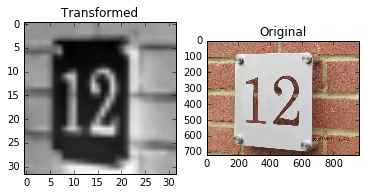

In [50]:
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img, cmap=plt.cm.Greys);
ax1.set_title('Transformed')

ax2.imshow(original, cmap=plt.cm.Greys);
ax2.set_title('Original')

In [51]:
# get image width and height
img_height = img.shape[0]
img_width = img.shape[1]

print img_height
print img_width

32
32


(32, 32, 1)
4
(32, 4)
(32, 8)
(32, 12)
(32, 16)
(32, 20)
(32, 24)
(32, 28)
(32, 32)


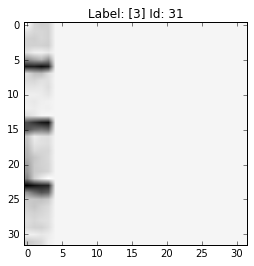

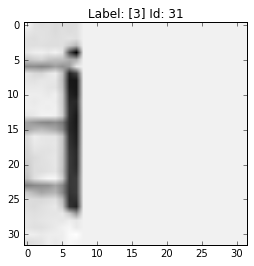

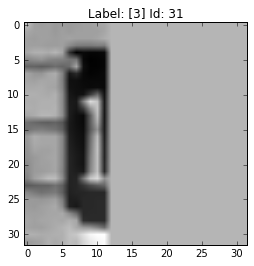

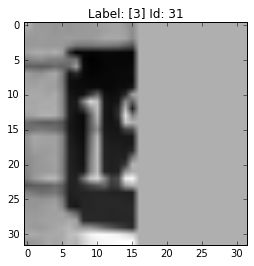

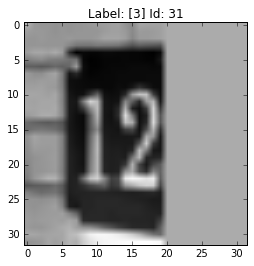

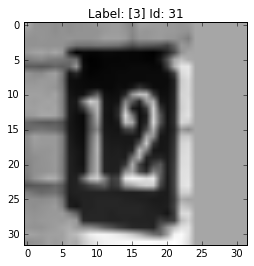

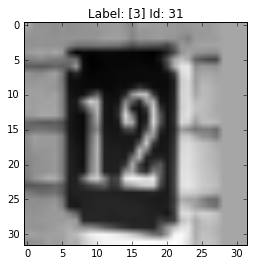

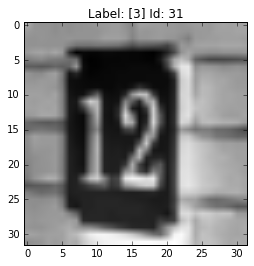

In [60]:
# iterate over 1/6 of the right portion of the image each time
# for each portion, create a 32 x 32 image filled with 0s
new_image = np.zeros(shape=(IMAGE_SIZE, IMAGE_SIZE, N_CHANNELS), dtype=np.float32)
print new_image.shape

offset = int(img_width / MAX_NUMBER_OF_SEGMENTATIONS)
print offset

start = 0
image_width = offset

for step in range(0,MAX_NUMBER_OF_SEGMENTATIONS):
    new_image = np.zeros(shape=(IMAGE_SIZE, IMAGE_SIZE, N_CHANNELS), dtype=np.float32)
    cropped_img = img[:,start :image_width]
    print cropped_img.shape

    for i in range(cropped_img.shape[0]):
        for j in range(cropped_img.shape[1]):
            new_image[i][j] = cropped_img[i][j]
        
    _, (ax1) = plt.subplots(1, 1)
    ax1.imshow(new_image.reshape(32,32), cmap=plt.cm.Greys);
    ax1.set_title('Label: ' + str(test_labels[i])+ " Id: " + str(i))
    
    image_width += offset